In [2]:
import sympy as sp
from IPython.display import display, Latex
from sympy import Eq
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Definición de las variables
x1, x2, k = sp.symbols('x1 x2 k')
x = sp.Matrix([x1, x2])
display(Latex('Defino variable $x$'))
display(Latex('$x = ' + sp.latex(x) + '$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
# Definición de la función
display(Latex('Función objetivo'))
f = (x1 - 5)**2 + (x2 - 5)**2 # Definimos la función
display(Latex('$f(x) = ' + sp.latex(f) + '$'))

# Restricciones
display(Latex('Restricciones'))
A = sp.Matrix([
    [2, -1],
    [1, 3],
    [-1, 0],
    [0, -1]
])
display(Latex('$A = ' + sp.latex(A) + '$'))
b = sp.Matrix([6, 12, 0, 0])
display(Latex('$b = ' + sp.latex(b) + '$'))

# Parámetros iniciales
x0 = sp.Matrix([1, 2])  # Punto inicial ga
lambda_k = 1 / k  # Definicion arbitraria

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
# Definición de las funciones \phi(t)
def phi_a(t):
    return t - sp.log(t) - 1

def phi_b(t):
    return t * sp.log(t) - t + 1

display(Latex('Casos para valores de funcion $\phi$'))
display(Latex('$(a)\quad \phi(k) = ' + sp.latex(phi_a(k)) + '$'))
display(Latex('$(b)\quad \phi(k) = ' + sp.latex(phi_b(k)) + '$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
# Función de distancia proximal D
def D(x, z, A, b, phi):
    y_x = b - A * x  # Calcula y(x) = b - Ax
    y_z = b - A * z  # Calcula y(z) = b - Az
    display(Latex('$$y(x) = ' + sp.latex(y_x) + ' \quad \quad y(z) = ' + sp.latex(y_z) + '$$'))
    display(Latex(r'$D(x,z)='+ sp.latex(sum (y_z[i]**2 * phi(y_x[i] / y_z[i]) for i in range(len(y_x)))) + '$'))
    return sum (y_z[i]**2 * phi(y_x[i] / y_z[i]) for i in range(len(y_x))) #Evalua en d(u,v) = sum_i y_i^2 * phi_a(y_i / z_i)

display(Latex('Definimos la funcion $D(x,z)$'))
display(Latex(r'$$d(u,v) = \sum_{i=1}^{m} y_i^2 \cdot \phi \left( \frac{y_i}{z_i}\right)$$'))
display(Latex(r'Donde $\quad y(x) = b - Ax \quad \text{y} \quad y(z) = b - Az$'))
print(D(x, x0, A, b, phi_a)) 


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

-16*x1 - 7*x2 - log(x1) - 4*log(x2/2) - 36*log(-x1/3 + x2/6 + 1) - 25*log(-x1/5 - 3*x2/5 + 12/5) + 30


In [7]:
def armijo_minimization(x0, f, restricciones, alpha=0.5, beta=0.85, sigma=0.75, epsilon=0.01, max_iter=150):
    x1, x2 = sp.symbols('x1 x2')
    x = [x1, x2]
    grad_f = sp.Matrix([f.diff(var) for var in x])
    display(Latex(r'Comienza el algoritmo de Armijo con $$x_0 = {'+sp.latex(x0)+'}\quad \quad \quad f = {'+sp.latex(f)+'}$$'))
    display(Latex(f"$\\nabla f(x_1, x_2) = ({sp.latex(grad_f[0])}, {sp.latex(grad_f[1])})$"))
    
    # Definimos variables para el algoritmo inicial
    k = 0
    x_k = x0
    iteraciones = []
    max_iter_inner = 300 # Límite de iteraciones internas para buscar un nuevo punto que satisfaga las restricciones

    while sp.sqrt(grad_f.subs({x1: x_k[0], x2: x_k[1]}).dot(grad_f.subs({x1: x_k[0], x2: x_k[1]}))) > epsilon and k < max_iter:
        iteraciones.append((k, x_k))
        grad_values = grad_f.subs({x1: x_k[0], x2: x_k[1]})
        m_k = 0
        d_k = -grad_values
        # Buscar m_k que satisface la condición de Armijo y las restricciones
        iter_inner = 0
        while iter_inner < max_iter_inner:
            iter_inner += 1
            x_new = x_k + alpha * beta**m_k * d_k
            restricciones_satisfechas = all([restric.subs({x1: x_new[0], x2: x_new[1]}) >= 0 for restric in restricciones])
            # Si no se satisfacen las restricciones, se reduce alpha y se intenta de nuevo
            if not restricciones_satisfechas:
                m_k += 1
                continue
            # FUNCIONA
            lhs = f.subs({x1: x_new[0].evalf(), x2: x_new[1].evalf()})
            rhs = f.subs({x1: x_k[0], x2: x_k[1]}).evalf() + sigma * alpha * beta**m_k * (grad_values.T * d_k)[0]
            if lhs.is_real and rhs.is_real and lhs <= rhs:
                break
            m_k += 1
    
        if iter_inner >= max_iter_inner:
            print(f"No se encontró un punto válido que satisfaga las restricciones después de {max_iter_inner} intentos en la iteración {k}.")
            return x_k, iteraciones
        
        # Actualización de x_k
        x_k = x_new
        k += 1

    iteraciones.append((k, x_k))
    
    return x_k, iteraciones

#fas = ( ((50-5*(x1))*x1)+((30-2*x2)*x2) - (2*((x1+x2)**2) + 10*(x1+x2)+120)  )*(-1)
fas = -16.0*x1 - 7.0*x2 + (x1 - 5)**2 + (x2 - 5)**2 - 1.0*sp.log(x1) - 4.0*sp.log(x2/2) - 36.0*sp.log(-x1/3 + x2/6 + 1) - 25.0*sp.log(-x1/5 - 3*x2/5 + 12/5) + 30.0

armijo_minimization(x0,fas,b - A * x)[0]

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[1.81687827196301],
[2.25978262513661]])

In [ ]:
def gradient_descent_matrix_irrestricta(x_0, f):
    display(Latex(r'Comienza el algoritmo Gradiente Descendente con $$x_0 = {'+sp.latex(x_0)+'}\quad \quad \quad f = {'+sp.latex(f)+'}$$'))
    grad_f = sp.Matrix([f.diff(var) for var in x])
    display(Latex(f'$\\nabla f = {sp.latex(grad_f)}$'))

    k = 0
    x_k = x_0
    iteraciones = []
    tol = 10**-6

    while True:
        iteraciones.append((k, x_k))
        grad_f_val = grad_f.subs({x1: x_k[0], x2: x_k[1]})
        #display(Latex(f'Gradiente evaluado: $x= {sp.latex(x_k)} \quad \\nabla f(x_{k}) = {sp.latex(grad_f_val)}$'))
        x_k_new = x_k - (1 / (k+1)) * grad_f_val
        #display(Latex(f'$x_{k+1}= {sp.latex(x_k_new)}$'))
        
        if grad_f_val.norm() < tol and (x_k_new - x_k).norm() < tol: # Condición de paro adfasdfdsaf
            break

        x_k = x_k_new
        k += 1

    return x_k, k


valores_finales = gradient_descent_matrix_irrestricta(x0, fas)

# Mostrar resultados

display(Latex(f'Valores finales: $x = {sp.latex(valores_finales)}$'))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
def gradient_descent_matrix(x_0, f, restricciones):
    x1, x2 = sp.symbols('x1 x2')
    x = [x1, x2]
    
    display(Latex(r'Comienza el algoritmo Gradiente Descendente con $$x_0 = {'+sp.latex(x_0)+'}\quad \quad \quad f = {'+sp.latex(f)+'}$$'))
    grad_f = sp.Matrix([f.diff(var) for var in x])
    display(Latex(f'$\\nabla f = {sp.latex(grad_f)}$'))

    k = 0
    x_k = x_0
    iteraciones = []
    tol = 10**-6
    max_iter = 500
    me = 0

    while True:
        iteraciones.append((k, x_k))
        grad_f_val = grad_f.subs({x1: x_k[0], x2: x_k[1]})
        #display(Latex(r'Gradiente evaluado: $x= {' + sp.latex(x_k) + '} \quad \\nabla f(x_{'+sp.latex(k)+'}) = {'+sp.latex(grad_f_val)+'}$'))
        step_size = 1 / (k + 1)
        
        # Intentar encontrar un x_k_new que cumpla las restricciones
        for _ in range(100):  # Máximo 100 intentos por iteración / si reducinmos a 50 va mas rapido
            x_k_new = x_k - step_size * grad_f_val
            #display(Latex(r'$x_{'+sp.latex(k+1)+'}= {'+sp.latex(x_k_new)+'}$'))
            restricciones_satisfechas = all([restric.subs({x1: x_k_new[0], x2: x_k_new[1]}) >= 0 for restric in restricciones])
            me += 1
            if restricciones_satisfechas:
                break  # Si cumple las restricciones, salimos del bucle
            else:
                #display(Latex(f'No cumple con las restricciones en el punto $x_{k+1}= {sp.latex(x_k_new)}$'))
                step_size /= 2  # Reducir el tamaño del paso si no cumple
        

        
        # Si no se encuentra un punto válido en los intentos, detener
        if not restricciones_satisfechas:
            print(f"No se encontró un punto válido después de 100 intentos en la iteración {k}.")
            break

        if grad_f_val.norm() < tol and (x_k_new - x_k).norm() < tol:  # Condición de paro
            break

        x_k = x_k_new
        k += 1
        
        if k >= max_iter:  # Condición de paro por número máximo de iteraciones
            print(f"Se alcanzó el número máximo de iteraciones: {max_iter}.")
            break
    display(Latex('Iteracion interna de 2do nivel: $'+ sp.latex(me) +'$'))
    return x_k, iteraciones


gradient_descent_matrix(x0, fas, b - A * x)[0]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[1.81761679810142],
[2.25961149893704]])

In [ ]:
# Implementación del algoritmo PPM (Proximal Point Method)
def PPM(f, A, b, x0, meth, tol=1e-6, max_iter=100):
    x_k = x0  # Inicialización del punto actual
    iteraciones = []  # Para almacenar el número de iteración y el valor de x_k
    
    while len(iteraciones) < max_iter:
        display(Latex('Iteración PPM: $' + sp.latex(len(iteraciones)) + '$'))
        display(Latex('Punto actual: $' + sp.latex(x_k) + '$'))
        
        # Calcula el gradiente de la función objetivo
        grad_f = sp.Matrix([f.diff(var) for var in x])
        display(Latex(f'Calculamos la gradiente de la función:'))
        display(Latex(f"$\\nabla f(x_1, x_2) = ({sp.latex(grad_f[0])}, {sp.latex(grad_f[1])})$"))
        
        # Evalúa el gradiente en el punto actual
        grad_f_k = grad_f.subs({x1: x_k[0], x2: x_k[1]})
        display(Latex('Gradiente evaluado en el punto actual:'))
        display(Latex(f"$\\nabla f(x_k) = {tuple(grad_f_k)}$"))
        
        # Condición de terminación: si el gradiente es suficientemente pequeño
        display(Latex(f'$||\\nabla f(x_k)|| = {grad_f_k.norm()}$'))
        if grad_f_k.norm() < tol:
            break
        display(Latex('La gradiente es distinta a 0, continuamos con el algoritmo'))
        
        # Calcula la función de distancia proximal D en el punto actual
        D_k = D(x, x_k, A, b, phi_a)
        display(Latex('Calculamos la función de distancia proximal en el punto actual:$' + sp.latex(D_k) + '$'))
        
        # Define el Lagrangiano proximal L_k
        L_k = (f + (1 / (len(iteraciones) + 1) * D_k))
        display(Latex('Lagrangiano a evaluar: $' + sp.latex(L_k) + '$'))
        
        # Usa un algoritmo para encontrar el mínimo de L_k
        if meth == 1:
            x_k_new, iterac_meth = gradient_descent_matrix(x_k, L_k, b - A * x)
        else:
            x_k_new, iterac_meth = armijo_minimization(x_k, L_k, b - A * x)
        display(Latex('Nuevo punto encontrado:$' + sp.latex(x_k_new) + '\quad$ en $' + sp.latex(iterac_meth[-1][0]) + '$ iteraciones'))
        
        # Almacena el número de iteración y el valor de x_k
        iteraciones.append((len(iteraciones), x_k))
        
        # Condición de terminación: si el cambio en x_k es suficientemente pequeño
        if (x_k_new - x_k).norm().evalf() < tol:
            break
        
        # Actualiza el punto actual para la siguiente iteración
        x_k = x_k_new
    
    # Almacena la última iteración
    iteraciones.append((len(iteraciones), x_k))
    
    return x_k, iteraciones, iterac_meth

In [ ]:
# Aplicación del algoritmo PPM con armijow
solucion_armijo, iteraciones_ppm_armijo, iteraciones_armijo = PPM(f, A, b, x0, 0)
display(Latex('Solución encontrada con PPL - Armijo: $'+sp.latex(solucion_armijo)+'$'))
display(Latex('Número de iteraciones: $'+sp.latex(iteraciones_ppm_armijo[-1][0])+'$'))
display(Latex('Iteraciones del algoritmo de Armijo: $'+sp.latex(iteraciones_armijo[-1][0])+'$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
# Aplicación del algoritmo PPM con gradiente descendente
solucion_gd, iteraciones_ppm_gd, iteraciones_gd = PPM(f, A, b, x0, 1)
display(Latex('Solución encontrada con PPL - Gradiente Descendiente: $'+sp.latex(solucion_gd)+'$'))
display(Latex('Número de iteraciones: $'+sp.latex(iteraciones_ppm_gd[-1][0])+'$'))
display(Latex('Iteraciones del algoritmo de Gradiente Descendiente: $'+sp.latex(iteraciones_gd[-1][0])+'$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Se alcanzó el número máximo de iteraciones: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

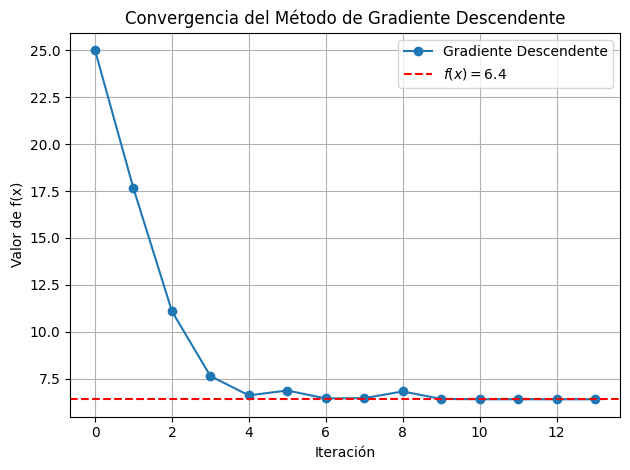

In [ ]:
# Separar los valores de iteración y los valores de la función objetivo en cada iteración
iter_gd = [i[0] for i in iteraciones_ppm_gd]
values_gd = [float(f.subs({x1: v[0], x2: v[1]})) for k, v in iteraciones_ppm_gd]

# Gráfica de convergencia del método de Gradiente Descendente
fig, ax = plt.subplots()

ax.plot(iter_gd, values_gd, label='Gradiente Descendente', marker='o')
ax.axhline(y=6.4, color='r', linestyle='--', label='$f(x) = 6.4$')  # Añadir línea horizontal en f(x) = 6.4

ax.set_xlabel('Iteración')
ax.set_ylabel('Valor de f(x)')
ax.set_title('Convergencia del Método de Gradiente Descendente')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


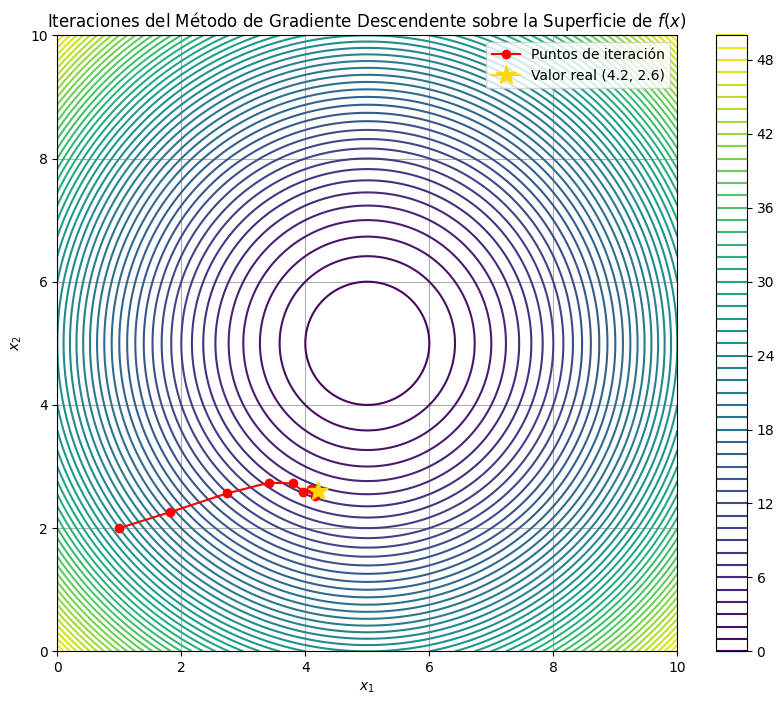

In [ ]:
# Definir la función
f_expr = (x1 - 5)**2 + (x2 - 5)**2

# Crear una malla de puntos para evaluar la función
x1_vals = np.linspace(0, 10, 400)
x2_vals = np.linspace(0, 10, 400)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
f_func = sp.lambdify((x1, x2), f_expr, "numpy")
f_vals = f_func(x1_grid, x2_grid)

# Valores reales
valor_real = [4.2, 2.6]

# Obtener las coordenadas de las iteraciones
coords_x1 = [v[0] for k, v in iteraciones_ppm_gd]
coords_x2 = [v[1] for k, v in iteraciones_ppm_gd]

# Crear el gráfico de contorno
plt.figure(figsize=(10, 8))
contour = plt.contour(x1_grid, x2_grid, f_vals, levels=50, cmap='viridis')
plt.colorbar(contour)

# Superponer los puntos de cada iteración
plt.plot(coords_x1, coords_x2, marker='o', color='red', linestyle='-', label='Puntos de iteración')

# Punto real
plt.plot(valor_real[0], valor_real[1], marker='*', color='gold', markersize=15, label='Valor real (4.2, 2.6)')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Iteraciones del Método de Gradiente Descendente sobre la Superficie de $f(x)$')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Separar los valores de iteración y los valores de la función objetivo en cada iteración
iter_gd = [i[0] for i in iteraciones_ppm_gd]
values_gd = [float(f.subs({x1: v[0], x2: v[1]})) for k, v in iteraciones_ppm_gd]

# Calcular el margen de error
margen_error_x1 = [abs(v[0] - valor_real[0]) for k, v in iteraciones_ppm_gd]
margen_error_x2 = [abs(v[1] - valor_real[1]) for k, v in iteraciones_ppm_gd]

data = {
    'Iteración': iter_gd,
    'Valor de x1': [v[0] for k, v in iteraciones_ppm_gd],
    'Valor de x2': [v[1] for k, v in iteraciones_ppm_gd],
    'Valor de f(x)': values_gd,
    'Margen de Error x1': margen_error_x1,
    'Margen de Error x2': margen_error_x2
}

df = pd.DataFrame(data)
display(df)


,Iteración,Valor de x1,Valor de x2,Valor de f(x),Margen de Error x1,Margen de Error x2
0,0,1,2,25.000000,3.20000000000000,0.600000000000000
1,1,1.81761679810142,2.25961149893704,17.637292,2.38238320189858,0.340388501062959
2,2,2.73116669389347,2.56230468528437,11.089963,1.46883330610653,0.0376953147156263
3,3,3.41349896669636,2.73757959555201,7.635532,0.786501033303644,0.137579595552011
4,4,3.80163292010641,2.72603312910060,6.607009,0.398367079893593,0.126033129100596
5,5,3.96962395123938,2.59055384657725,6.867106,0.230376048760621,0.00944615342274968
6,6,4.09813790477506,2.62721571133423,6.443461,0.101862095224941,0.0272157113342288
7,7,4.15264201634992,2.60395418374986,6.459051,0.0473579836500848,0.00395418374986134
8,8,4.15763278231187,2.52848363694667,6.817976,0.0423672176881338,0.0715163630533282
9,9,4.18868041232797,2.60002708311974,6.418109,0.0113195876720331,2.70831197393129e-5
